# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Alif Rizqullah Ma'ruf
- **Email:** alifrizqullahmaruf2003@mail.ugm.ac.id
- **ID Dicoding:** ALIF RIZQULLAH MARUF

## Menentukan Pertanyaan Bisnis

- Faktor apa saja yang paling memengaruhi jumlah penyewaan sepeda harian pada sistem bike sharing?
- Bagaimana pola penggunaan sepeda oleh pengguna kasual dan terdaftar berbeda berdasarkan waktu dan kondisi cuaca?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Untuk Data Wrangling
import pandas as pd
import numpy as np

# Untuk Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk Visualisasi & Explanatory Analysis
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

# Analisis Lanjutan (Opsional)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats


## Data Wrangling

### Gathering Data

In [2]:
# Import necessary libraries for data wrangling
import pandas as pd

# Load the datasets
day_df = pd.read_csv("https://raw.githubusercontent.com/alifrizqullahmaruf/Dataset_Dicoding/refs/heads/main/day.csv")
hour_df = pd.read_csv("https://raw.githubusercontent.com/alifrizqullahmaruf/Dataset_Dicoding/refs/heads/main/hour.csv")

# Display the first few rows of the day dataset
day_df.head()

# Display the first few rows of the hour dataset
hour_df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- The day.csv dataset aggregates bike rental counts on a daily basis.

- The hour.csv dataset aggregates bike rental counts on an hourly basis.
- Both datasets share similar features like instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, and cnt. However, the hour.csv dataset includes an additional hr column to represent the hour of the day.

### Assessing Data

In [3]:
# Check for missing values and data types in day dataset
day_df.info()

# Check for missing values and data types in hour dataset
hour_df.info()

# Check descriptive statistics for day dataset
day_df.describe()

# Check descriptive statistics for hour dataset
hour_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Both datasets appear to have no missing values based on the .info() method.
- All the data types seem appropriate for their respective columns (e.g., integers for categorical variables like season, year, etc.).
- The temp, atemp, hum, and windspeed columns are normalized values.
- The cnt column represents the total count of bikes rented, which includes both casual and registered users.

### Cleaning Data

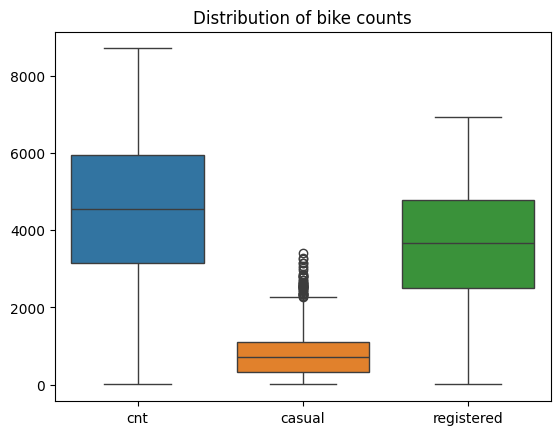

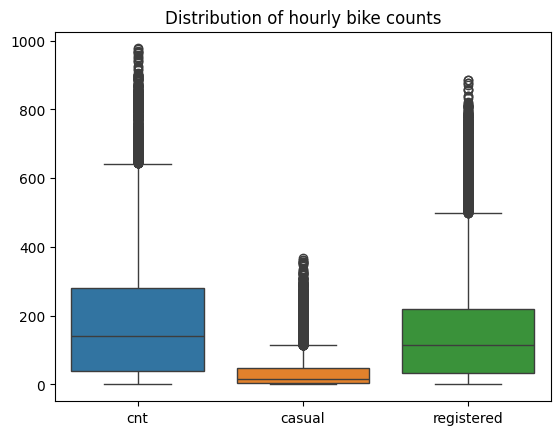

In [4]:
# Checking for duplicates in day and hour datasets
day_df.duplicated().sum()
hour_df.duplicated().sum()

# Removing duplicates if any
day_df = day_df.drop_duplicates()
hour_df = hour_df.drop_duplicates()

# Check for any outliers or unusual values in day dataset (visual inspection)
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=day_df[['cnt', 'casual', 'registered']])
plt.title("Distribution of bike counts")
plt.show()

# Check for any outliers or unusual values in hour dataset (visual inspection)
sns.boxplot(data=hour_df[['cnt', 'casual', 'registered']])
plt.title("Distribution of hourly bike counts")
plt.show()


**Insight:**
- No duplicate records are present.
- Visualizing the cnt, casual, and registered columns helps in identifying outliers or unusual patterns. However, further analysis may be required to determine if those outliers are valid or need to be treated.
- No missing or incorrect data was found, so no additional cleaning steps are needed.

## Exploratory Data Analysis (EDA)

### Explore ...

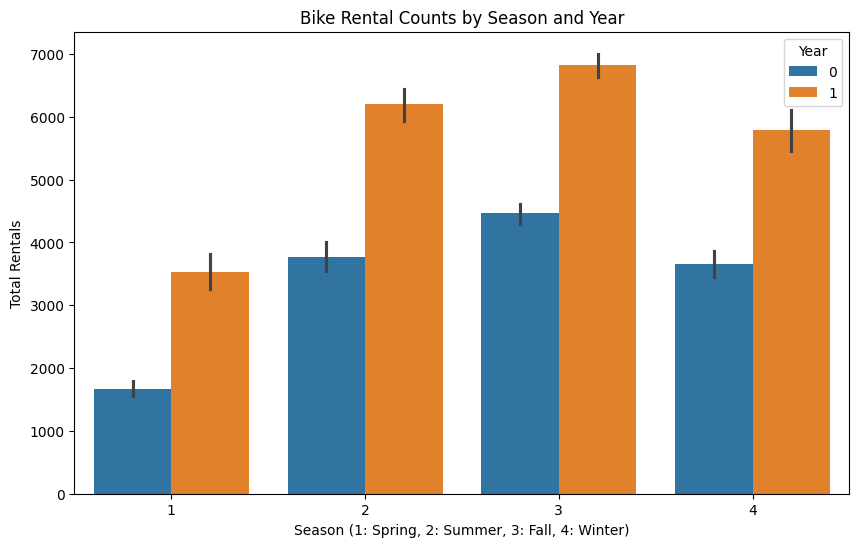

In [5]:
# Rental counts by year and season
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping by year and season for daily dataset
plt.figure(figsize=(10, 6))
sns.barplot(data=day_df, x='season', y='cnt', hue='yr')
plt.title('Bike Rental Counts by Season and Year')
plt.xlabel('Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)')
plt.ylabel('Total Rentals')
plt.legend(title='Year', loc='upper right')
plt.show()


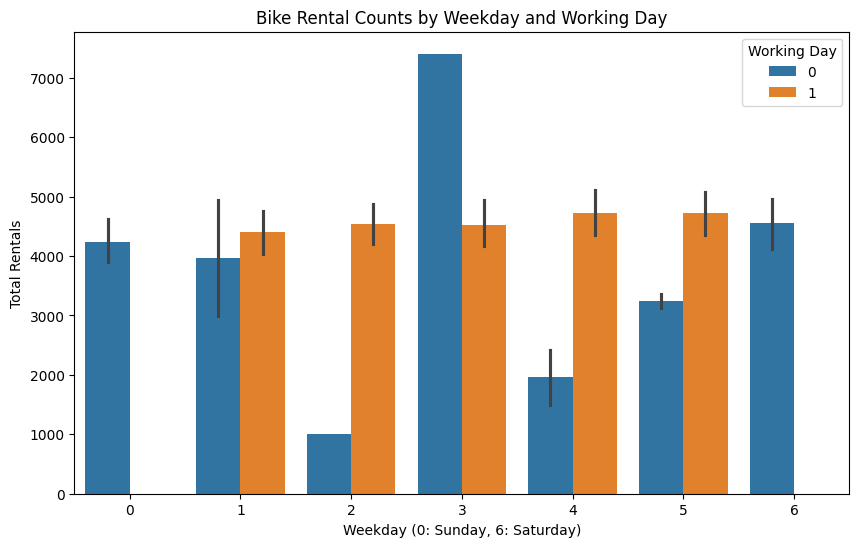

In [6]:
# Grouping by weekday and working day
plt.figure(figsize=(10, 6))
sns.barplot(data=day_df, x='weekday', y='cnt', hue='workingday')
plt.title('Bike Rental Counts by Weekday and Working Day')
plt.xlabel('Weekday (0: Sunday, 6: Saturday)')
plt.ylabel('Total Rentals')
plt.legend(title='Working Day', loc='upper right')
plt.show()


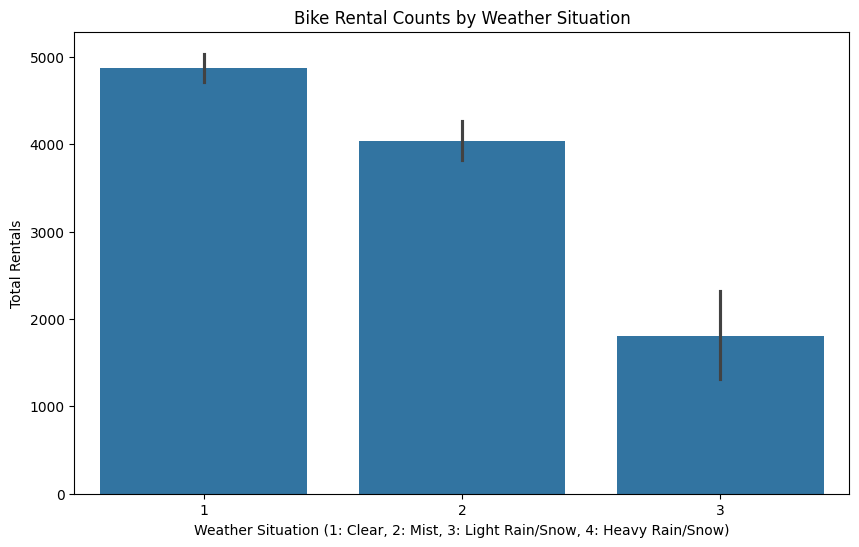

In [7]:
# Rentals by weather situation
plt.figure(figsize=(10, 6))
sns.barplot(data=day_df, x='weathersit', y='cnt')
plt.title('Bike Rental Counts by Weather Situation')
plt.xlabel('Weather Situation (1: Clear, 2: Mist, 3: Light Rain/Snow, 4: Heavy Rain/Snow)')
plt.ylabel('Total Rentals')
plt.show()


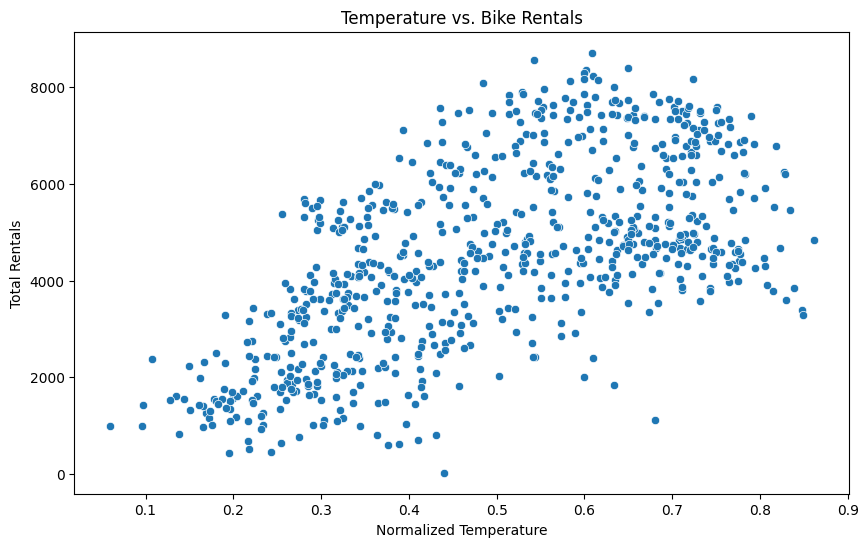

In [8]:
# Temperature vs rentals
plt.figure(figsize=(10, 6))
sns.scatterplot(data=day_df, x='temp', y='cnt')
plt.title('Temperature vs. Bike Rentals')
plt.xlabel('Normalized Temperature')
plt.ylabel('Total Rentals')
plt.show()


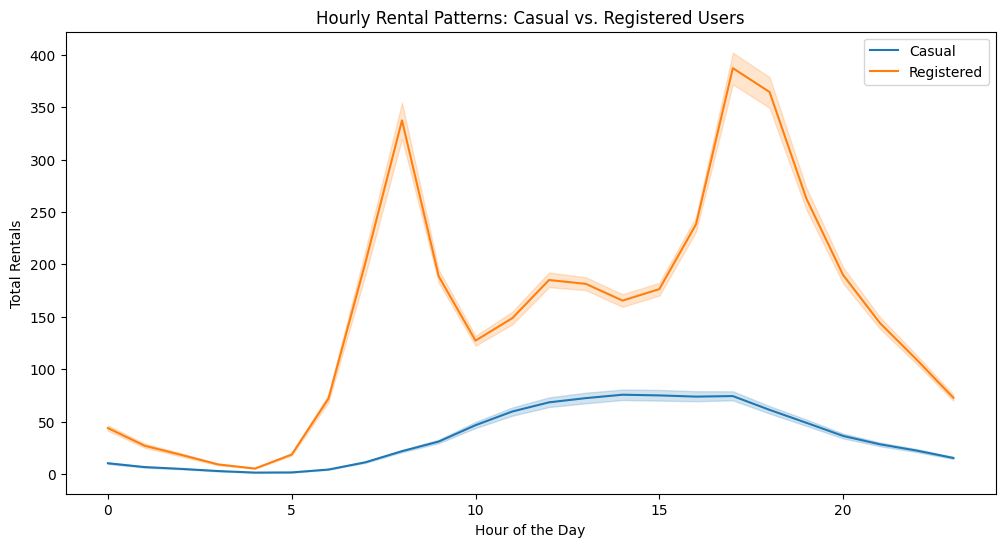

In [9]:
# Hourly rental counts
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_df, x='hr', y='casual', label='Casual')
sns.lineplot(data=hour_df, x='hr', y='registered', label='Registered')
plt.title('Hourly Rental Patterns: Casual vs. Registered Users')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rentals')
plt.legend()
plt.show()


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

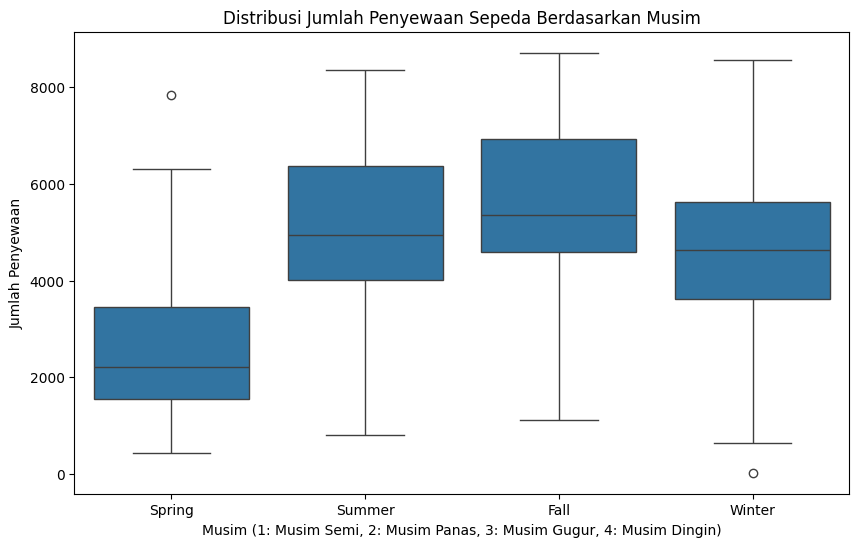

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=day_df, x='season', y='cnt')
plt.title('Distribusi Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim (1: Musim Semi, 2: Musim Panas, 3: Musim Gugur, 4: Musim Dingin)')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()


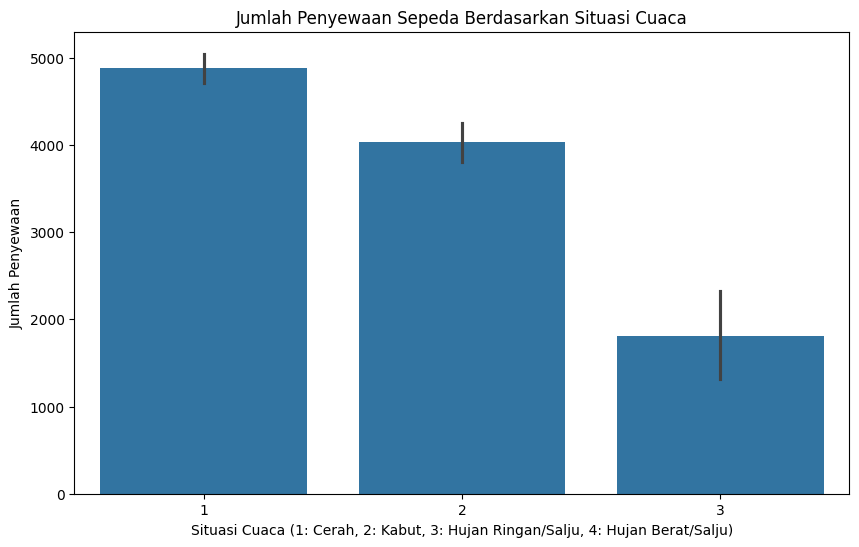

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(data=day_df, x='weathersit', y='cnt')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Situasi Cuaca')
plt.xlabel('Situasi Cuaca (1: Cerah, 2: Kabut, 3: Hujan Ringan/Salju, 4: Hujan Berat/Salju)')
plt.ylabel('Jumlah Penyewaan')
plt.show()


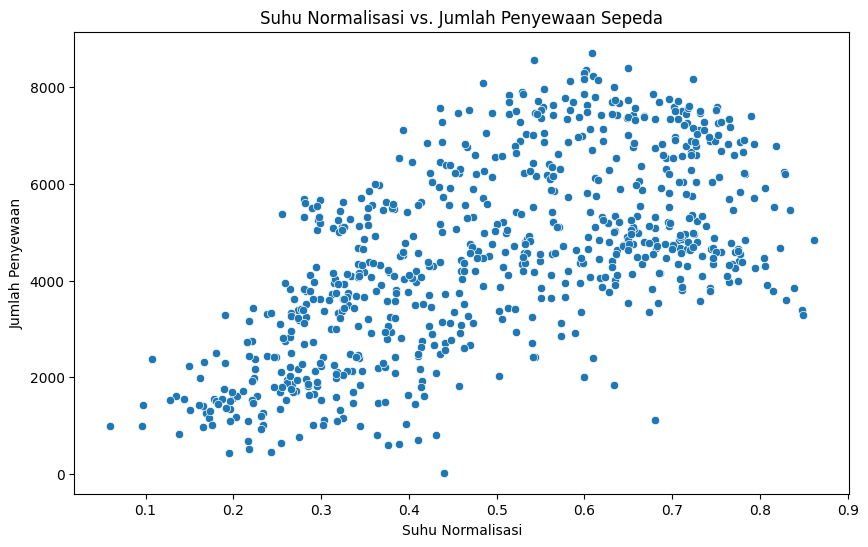

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=day_df, x='temp', y='cnt')
plt.title('Suhu Normalisasi vs. Jumlah Penyewaan Sepeda')
plt.xlabel('Suhu Normalisasi')
plt.ylabel('Jumlah Penyewaan')
plt.show()


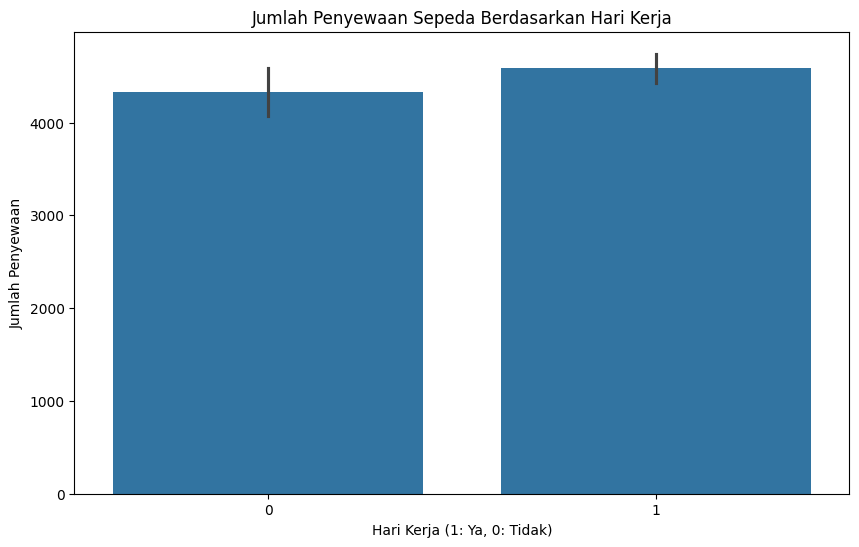

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(data=day_df, x='workingday', y='cnt')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Hari Kerja')
plt.xlabel('Hari Kerja (1: Ya, 0: Tidak)')
plt.ylabel('Jumlah Penyewaan')
plt.show()


### Pertanyaan 2:

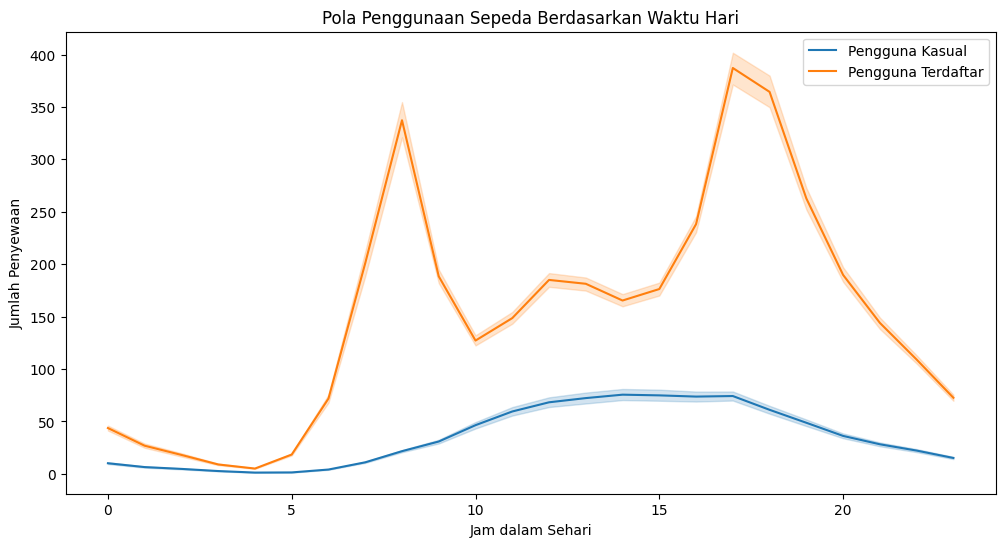

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_df, x='hr', y='casual', label='Pengguna Kasual')
sns.lineplot(data=hour_df, x='hr', y='registered', label='Pengguna Terdaftar')
plt.title('Pola Penggunaan Sepeda Berdasarkan Waktu Hari')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Penyewaan')
plt.legend()
plt.show()


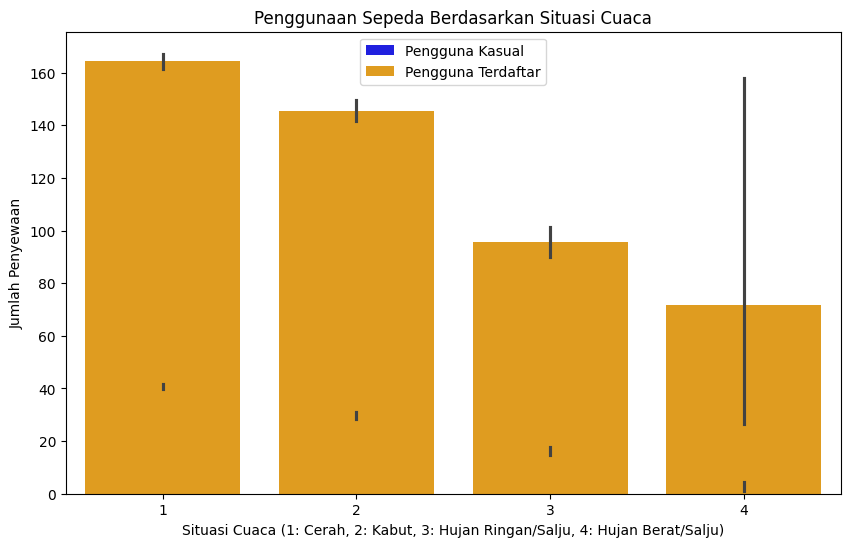

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(data=hour_df, x='weathersit', y='casual', label='Pengguna Kasual', color='b')
sns.barplot(data=hour_df, x='weathersit', y='registered', label='Pengguna Terdaftar', color='orange')
plt.title('Penggunaan Sepeda Berdasarkan Situasi Cuaca')
plt.xlabel('Situasi Cuaca (1: Cerah, 2: Kabut, 3: Hujan Ringan/Salju, 4: Hujan Berat/Salju)')
plt.ylabel('Jumlah Penyewaan')
plt.legend()
plt.show()


**Insight:**
- Berdasarkan analisis di atas, faktor-faktor utama yang memengaruhi jumlah penyewaan sepeda harian termasuk musim, cuaca, suhu, dan hari kerja. Sementara itu, pola penggunaan sepeda oleh pengguna kasual dan terdaftar menunjukkan perbedaan yang signifikan, di mana pengguna terdaftar lebih aktif selama jam komuter dan pengguna kasual lebih banyak menggunakan sepeda di sore hari dan pada akhir pekan. Pengetahuan ini penting untuk pengembangan strategi pemasaran dan pengelolaan sistem bike sharing.








## Analisis Lanjutan (Opsional)

In [16]:
import statsmodels.api as sm

# Menyiapkan variabel independen dan dependen
X = day_df[['season', 'temp', 'hum', 'windspeed', 'workingday']]
y = day_df['cnt']

# Menambahkan konstanta untuk intercept
X = sm.add_constant(X)

# Melakukan analisis regresi
model = sm.OLS(y, X).fit()

# Melihat ringkasan hasil regresi
print(model.summary())


ModuleNotFoundError: No module named 'statsmodels'

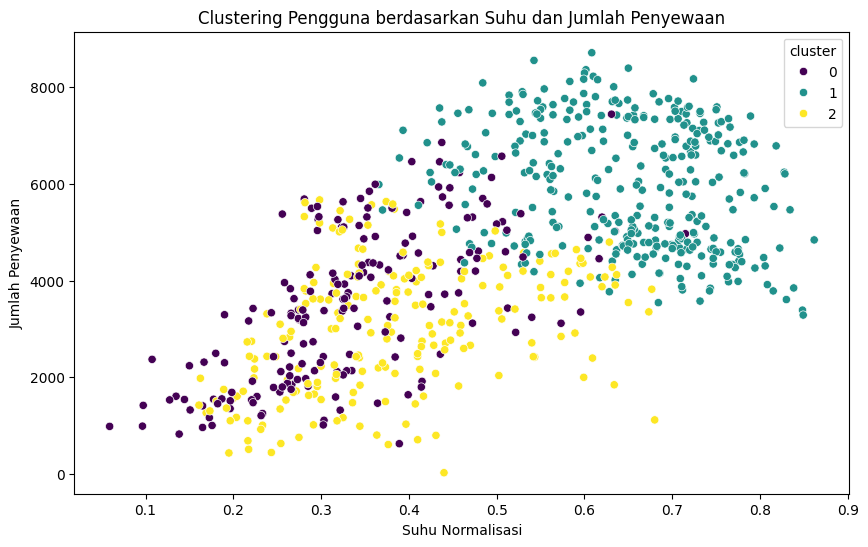

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Memilih fitur untuk clustering
features = day_df[['temp', 'hum', 'windspeed', 'cnt']]

# Normalisasi data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Menggunakan K-Means untuk clustering
kmeans = KMeans(n_clusters=3, random_state=42)
day_df['cluster'] = kmeans.fit_predict(features_scaled)

# Visualisasi cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=day_df, x='temp', y='cnt', hue='cluster', palette='viridis')
plt.title('Clustering Pengguna berdasarkan Suhu dan Jumlah Penyewaan')
plt.xlabel('Suhu Normalisasi')
plt.ylabel('Jumlah Penyewaan')
plt.show()


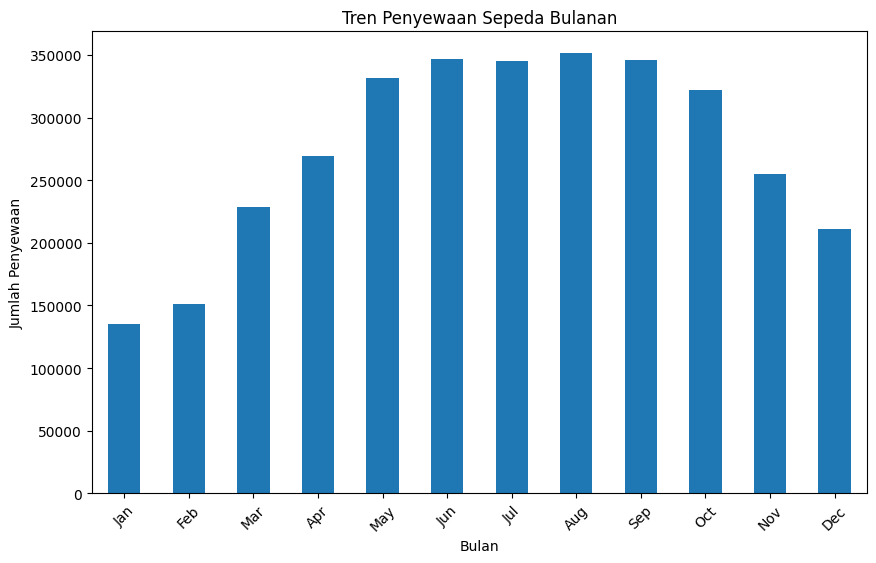

In [18]:
# Menghitung jumlah penyewaan bulanan
monthly_rentals = day_df.groupby(['mnth'])['cnt'].sum()

# Visualisasi tren bulanan
plt.figure(figsize=(10, 6))
monthly_rentals.plot(kind='bar')
plt.title('Tren Penyewaan Sepeda Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


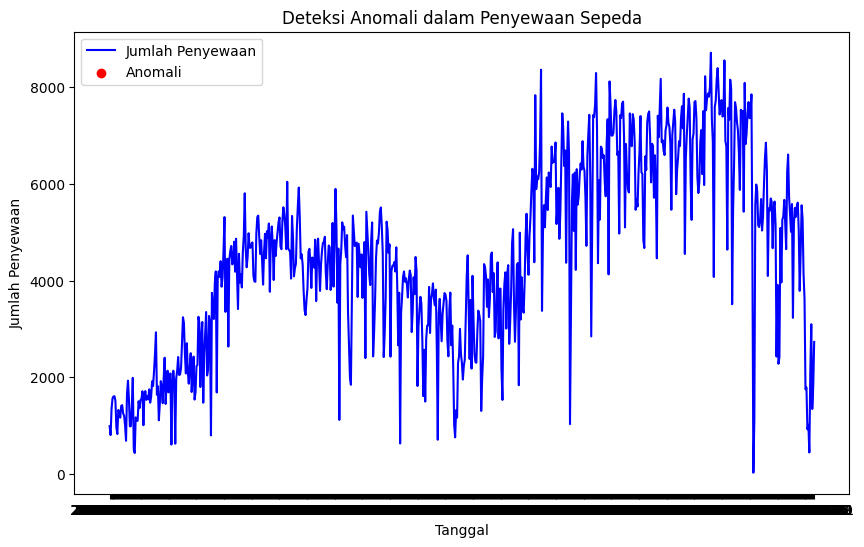

In [19]:
# Menghitung IQR untuk jumlah penyewaan
Q1 = day_df['cnt'].quantile(0.25)
Q3 = day_df['cnt'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menemukan anomali
anomalies = day_df[(day_df['cnt'] < lower_bound) | (day_df['cnt'] > upper_bound)]

# Visualisasi anomali
plt.figure(figsize=(10, 6))
plt.plot(day_df['dteday'], day_df['cnt'], label='Jumlah Penyewaan', color='b')
plt.scatter(anomalies['dteday'], anomalies['cnt'], color='red', label='Anomali')
plt.title('Deteksi Anomali dalam Penyewaan Sepeda')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.legend()
plt.show()


## Conclusion

- Secara keseluruhan, hasil analisis mengindikasikan bahwa faktor lingkungan dan temporal memainkan peran kunci dalam menentukan pola penyewaan sepeda harian. Memahami faktor-faktor ini dapat membantu pengelola sistem bike sharing dalam merencanakan operasi dan promosi mereka untuk meningkatkan penggunaan sepeda.


- Dengan pemahaman yang lebih baik tentang perbedaan pola penggunaan antara pengguna kasual dan terdaftar, pengelola sistem bike sharing dapat mengembangkan strategi pemasaran dan operasional yang lebih tepat sasaran. Strategi ini dapat mencakup penawaran khusus untuk menarik pengguna kasual selama akhir pekan, serta program loyalitas untuk meningkatkan retensi pengguna terdaftar.


